In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('roas_matured.csv')
# df = df.fillna(0)
df.head()

,ad_id,source,ad_start,ad_end,days_active,spend,impressions,clicks,ctr,n_leads,inbounded_perc,high_leads_perc,adult_leads_perc,n_connected_calls,revenue,roas
0,120200176763890164,fb,"12 October, 2023","29 November, 2023",49,"22,513.79","1,382,232","6,264",0.453180,678,77.58,14.01,50.29,0,"42,300",1.88
1,120200380862490164,fb,"13 October, 2023","8 November, 2023",8,656.17,"16,037",93,0.579909,0,NaN,NaN,NaN,NaN,0,0
2,120200382263810164,fb,"13 October, 2023","7 November, 2023",15,944.19,"16,955",86,0.507225,0,NaN,NaN,NaN,NaN,0,0
3,120200382328750164,fb,"13 October, 2023","16 October, 2023",4,65.08,751,6,0.800000,0,NaN,NaN,NaN,NaN,0,0
4,120200449814490164,fb,"14 October, 2023","2 November, 2023",15,553.32,"23,049",64,0.277669,10,100.00,50.00,10.00,0,0,0


In [3]:
df.spend = df.spend.str.replace(',','').astype(float)
df.clicks = df.clicks.str.replace(',','').astype(int)
df.impressions = df.impressions.str.replace(',','').astype(int)
df.n_connected_calls = df.n_connected_calls.str.replace(',','').astype(float)
df.revenue = df.revenue.str.replace(',','').astype(float)
df.n_leads = df.n_leads.str.replace(',','').astype(int)
df.roas = df.roas.str.replace(',','').astype(float)
df.ad_start = pd.to_datetime(df.ad_start, format= '%d %B, %Y')
df.ad_end = pd.to_datetime(df.ad_end, format= '%d %B, %Y')

In [4]:
df.describe()

,ad_id,ad_start,ad_end,days_active,spend,impressions,clicks,ctr,n_leads,inbounded_perc,high_leads_perc,adult_leads_perc,n_connected_calls,revenue,roas
count,2.483000e+03,2483,2483,2483.000000,2483.000000,2.483000e+03,2483.000000,2483.000000,2483.000000,1215.000000,1215.000000,1215.000000,1215.000000,2.483000e+03,2483.000000
mean,5.587764e+16,2024-01-07 07:03:21.530406656,2024-01-29 19:36:07.539267072,18.889650,5545.213692,3.157797e+05,1689.963351,0.563044,144.587193,78.610313,26.837942,29.287122,70.261728,1.525585e+04,3.468988
min,6.337419e+11,2022-11-16 00:00:00,2022-11-16 00:00:00,1.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,6.972999e+11,2023-09-07 00:00:00,2023-09-12 00:00:00,4.000000,96.080000,2.928000e+03,14.000000,0.317013,0.000000,72.695000,16.670000,2.395000,0.000000,0.000000e+00,0.000000
50%,2.385747e+16,2024-01-22 00:00:00,2024-02-11 00:00:00,11.000000,508.630000,1.829900e+04,87.000000,0.460000,0.000000,81.480000,25.000000,14.290000,0.000000,0.000000e+00,0.000000
75%,1.202074e+17,2024-05-04 00:00:00,2024-05-28 00:00:00,26.000000,2663.985000,1.214325e+05,574.500000,0.666839,22.500000,89.900000,33.330000,50.000000,18.000000,0.000000e+00,0.000000
max,1.202138e+17,2024-11-03 00:00:00,2024-11-10 00:00:00,179.000000,408694.510000,2.277195e+07,135588.000000,13.730000,13673.000000,100.000000,100.000000,100.000000,5456.000000,1.026493e+06,3523.490000
std,5.470967e+16,NaN,NaN,21.256006,18513.040881,1.197276e+06,7078.987596,0.639740,663.159333,19.603689,19.670094,33.414871,288.450560,6.336757e+04,72.451870


In [5]:
df[df.roas==0].describe()

,ad_id,ad_start,ad_end,days_active,spend,impressions,clicks,ctr,n_leads,inbounded_perc,high_leads_perc,adult_leads_perc,n_connected_calls,revenue,roas
count,1.878000e+03,1878,1878,1878.000000,1878.000000,1.878000e+03,1878.000000,1878.000000,1878.000000,610.000000,610.000000,610.000000,610.000000,1878.0,1878.0
mean,5.494609e+16,2023-12-10 03:56:09.968051200,2023-12-27 21:20:30.670926592,13.809372,1952.271570,7.831242e+04,483.362087,0.563532,5.974441,77.409607,25.770393,27.628213,3.809836,0.0,0.0
min,6.337419e+11,2022-11-16 00:00:00,2022-11-16 00:00:00,1.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,7.030002e+11,2023-07-19 00:00:00,2023-08-09 06:00:00,3.000000,52.930000,1.607750e+03,6.000000,0.284774,0.000000,66.670000,0.000000,0.000000,0.000000,0.0,0.0
50%,2.385743e+16,2023-12-21 00:00:00,2024-01-04 00:00:00,8.000000,249.795000,8.068500e+03,38.000000,0.468055,0.000000,83.330000,22.905000,11.435000,0.000000,0.0,0.0
75%,1.202058e+17,2024-03-30 00:00:00,2024-05-12 12:00:00,16.000000,943.712500,3.319575e+04,161.000000,0.675790,2.000000,100.000000,33.637500,50.000000,1.000000,0.0,0.0
max,1.202138e+17,2024-11-03 00:00:00,2024-11-10 00:00:00,179.000000,256746.350000,1.095795e+07,110971.000000,13.730000,398.000000,100.000000,100.000000,100.000000,158.000000,0.0,0.0
std,5.298754e+16,NaN,NaN,17.393006,10339.938354,4.317437e+05,3341.665267,0.699533,24.157810,25.405753,25.170563,34.234777,12.941446,0.0,0.0


In [6]:
df[(df.roas <= 1) & (df.roas>0)].describe()

,ad_id,ad_start,ad_end,days_active,spend,impressions,clicks,ctr,n_leads,inbounded_perc,high_leads_perc,adult_leads_perc,n_connected_calls,revenue,roas
count,6.800000e+01,68,68,68.000000,68.000000,6.800000e+01,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,4.418065e+16,2024-02-08 20:07:03.529411840,2024-03-26 01:24:42.352941056,44.132353,23093.481765,1.821430e+06,11282.455882,0.708234,824.308824,72.760735,23.711176,21.855441,10.926471,15767.647059,0.681879
min,6.733674e+11,2023-09-09 00:00:00,2023-10-29 00:00:00,6.000000,821.410000,4.748600e+04,152.000000,0.022299,6.000000,27.830000,9.470000,0.000000,0.000000,500.000000,0.043963
25%,6.914059e+11,2023-11-02 00:00:00,2024-01-19 00:00:00,28.750000,4982.120000,2.418152e+05,1021.500000,0.362230,75.000000,69.312500,18.730000,5.592500,0.000000,3000.000000,0.515609
50%,7.000370e+11,2024-02-23 00:00:00,2024-04-16 12:00:00,40.000000,8080.600000,4.789120e+05,2404.500000,0.492857,183.500000,73.105000,23.060000,14.770000,0.000000,5000.000000,0.741024
75%,1.202046e+17,2024-03-23 18:00:00,2024-05-06 06:00:00,54.500000,19125.992500,1.023178e+06,5818.250000,0.785964,599.250000,79.617500,27.960000,26.425000,5.250000,14375.000000,0.872827
max,1.202129e+17,2024-10-15 00:00:00,2024-11-04 00:00:00,111.000000,174873.470000,2.277195e+07,135588.000000,5.560000,9651.000000,93.260000,43.400000,94.830000,162.000000,162000.000000,1.000000
std,5.689796e+16,NaN,NaN,22.799518,37277.143248,3.978529e+06,24002.151842,0.821035,1799.765277,11.506690,7.993440,23.631029,26.071839,29101.778123,0.245896


In [7]:
df[(df.roas > 1) & (df.roas<10)].describe()

,ad_id,ad_start,ad_end,days_active,spend,impressions,clicks,ctr,n_leads,inbounded_perc,high_leads_perc,adult_leads_perc,n_connected_calls,revenue,roas
count,4.370000e+02,437,437,437.000000,437.000000,4.370000e+02,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000
mean,5.682792e+16,2024-03-30 00:06:35.423341056,2024-05-06 18:33:46.544622336,35.320366,18511.669634,1.120755e+06,5474.675057,0.545702,640.475973,79.603066,27.254211,30.140419,168.318078,67752.549199,3.949291
min,6.769824e+11,2023-09-23 00:00:00,2023-10-25 00:00:00,2.000000,148.370000,5.394000e+03,0.000000,0.000000,1.000000,8.330000,0.000000,0.000000,0.000000,1000.000000,1.020000
25%,6.920340e+11,2024-01-22 00:00:00,2024-02-12 00:00:00,16.000000,2961.220000,1.434190e+05,677.000000,0.372343,56.000000,75.000000,20.910000,6.100000,0.000000,8500.000000,2.000000
50%,7.136800e+11,2024-03-23 00:00:00,2024-05-18 00:00:00,31.000000,7924.310000,4.165520e+05,2064.000000,0.449994,199.000000,80.460000,26.670000,15.140000,10.000000,25500.000000,3.180000
75%,1.202088e+17,2024-05-30 00:00:00,2024-06-30 00:00:00,49.000000,21099.890000,1.253462e+06,5785.000000,0.601135,687.000000,85.240000,31.910000,59.750000,128.000000,69000.000000,5.600000
max,1.202132e+17,2024-10-17 00:00:00,2024-11-10 00:00:00,145.000000,408694.510000,1.784949e+07,135108.000000,2.930000,13673.000000,100.000000,75.000000,100.000000,5456.000000,937500.000000,9.780000
std,5.973126e+16,NaN,NaN,23.913220,31429.803011,1.905322e+06,10556.418373,0.317047,1262.119681,9.505314,9.652470,31.662588,458.068133,120643.665372,2.399240


In [8]:
df[df.roas>=10].describe()

,ad_id,ad_start,ad_end,days_active,spend,impressions,clicks,ctr,n_leads,inbounded_perc,high_leads_perc,adult_leads_perc,n_connected_calls,revenue,roas
count,1.000000e+02,100,100,100.000000,100.00000,1.000000e+02,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,1.000000e+02,100.000000
mean,7.717334e+16,2024-05-31 00:00:00,2024-06-29 21:07:12,25.330000,4424.43200,2.338316e+05,1287.850000,0.530943,118.490000,85.574000,33.657100,40.73110,87.460000,7.200221e+04,68.412900
min,6.865536e+11,2023-10-05 00:00:00,2023-10-25 00:00:00,1.000000,2.98000,6.400000e+01,1.000000,0.199760,1.000000,15.630000,0.000000,0.00000,0.000000,1.500000e+03,10.130000
25%,7.067432e+11,2024-04-21 00:00:00,2024-05-24 00:00:00,10.000000,434.27750,2.089275e+04,85.750000,0.375009,10.500000,81.475000,23.357500,5.51500,0.750000,9.375000e+03,12.210000
50%,1.202097e+17,2024-06-19 12:00:00,2024-07-24 00:00:00,18.000000,1556.05000,7.898450e+04,390.500000,0.461010,34.000000,87.065000,31.010000,24.76500,29.000000,3.200000e+04,16.820000
75%,1.202113e+17,2024-08-01 00:00:00,2024-08-24 12:00:00,32.000000,5002.02250,2.291512e+05,964.250000,0.584720,124.000000,91.732500,39.230000,85.29000,98.750000,8.275000e+04,25.090000
max,1.202136e+17,2024-10-23 00:00:00,2024-11-10 00:00:00,149.000000,70592.93000,2.645188e+06,25006.000000,1.560000,1165.000000,100.000000,100.000000,100.00000,972.000000,1.026493e+06,3523.490000
std,5.771990e+16,NaN,NaN,23.680131,8648.91809,4.581943e+05,3122.598938,0.258984,197.512638,12.993809,18.226006,38.71339,149.512232,1.271370e+05,356.486547


In [9]:
df['inbounds_ratio'] = df.inbounded_perc/100
df['high_leads_ratio'] = df.high_leads_perc/100
df['adults_ratio'] = df.adult_leads_perc/100
# df['z3_ratio'] = df.z3_coverage/100

In [11]:
df['impressions_per_day_per_spend'] = (df.impressions/df.spend/df.days_active)
df['connected_call_per_inbound'] = df.n_connected_calls/(df.n_leads*df.inbounds_ratio)
df['lead_to_click_ratio'] = df.n_leads/df.clicks
df_cleaned = df.drop(columns = ['ad_id','source','ad_start','ad_end','days_active','spend','impressions','clicks','n_leads','n_connected_calls','inbounded_perc','high_leads_perc','adult_leads_perc'])
# df_cleaned = df_cleaned.replace(np.nan,0)
df_cleaned = df_cleaned.replace(np.inf,np.nan)
df_cleaned = df_cleaned.dropna()

In [12]:
roas = df_cleaned.pop('roas')
revenue = df_cleaned.pop('revenue')

In [13]:
df_cleaned.head()

,ctr,inbounds_ratio,high_leads_ratio,adults_ratio,impressions_per_day_per_spend,connected_call_per_inbound,lead_to_click_ratio
0,0.453180,0.7758,0.1401,0.5029,1.252957,0.0,0.108238
4,0.277669,1.0000,0.5000,0.1000,2.777055,0.0,0.156250
5,0.493011,0.8636,0.3182,0.2273,2.288098,0.0,0.063584
6,0.626065,0.7500,0.1667,0.0833,1.825634,0.0,0.075949
7,0.414584,1.0000,0.0000,0.0000,2.213949,0.0,0.058824


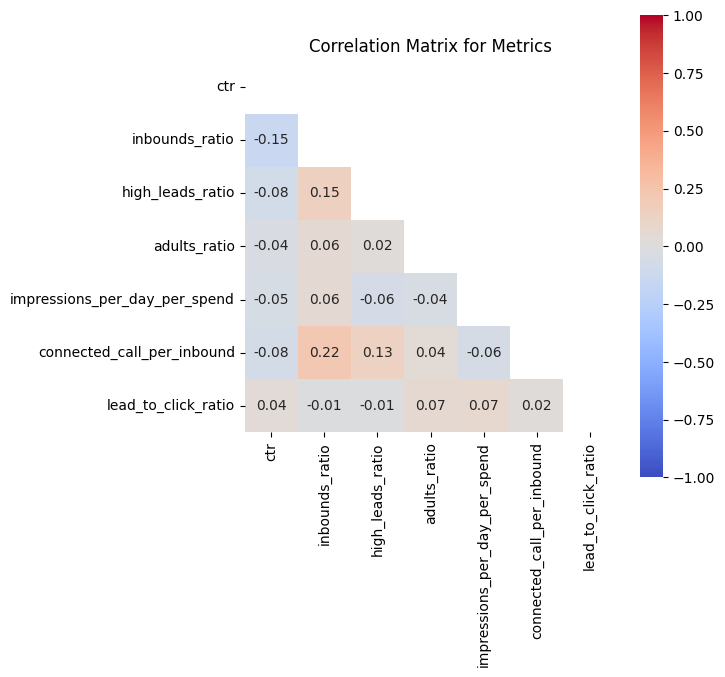

In [14]:
corrs = df_cleaned.corr()
mask = np.triu(np.ones_like(corrs, dtype = bool))
plt.figure(figsize=(6,6))
sns.heatmap(corrs.where(~mask), annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, cbar=True, fmt=".2f")
plt.title("Correlation Matrix for Metrics")
plt.show()

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def compute_vif(df):
    vif = pd.DataFrame()
    vif['features'] = pd.Series(df.columns)
    vif['VIF_values'] = [variance_inflation_factor(df.values,i) for i in range(len(df.columns))]
    return vif.sort_values(by='VIF_values').reset_index(drop=True)

compute_vif(df_cleaned)

,features,VIF_values
0,lead_to_click_ratio,1.018738
1,impressions_per_day_per_spend,1.441254
2,connected_call_per_inbound,1.548797
3,adults_ratio,1.785250
4,ctr,1.885699
5,high_leads_ratio,3.090934
6,inbounds_ratio,5.839432


In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso

In [72]:
# Split the data into training and testing sets
#scaler = MinMaxScaler()
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(df_cleaned), columns=df_cleaned.columns)
y = scaler.fit_transform(roas.values.reshape(-1, 1)).flatten()
# X = df_cleaned
# y = roas .reset_index(drop=True)
X_train = X 
y_train = y
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train_const = sm.add_constant(X_train)
# X_test_const = sm.add_constant(X_test)

# Fit the OLS model with training data
model = sm.OLS(y_train, X_train_const).fit()

y_est = model.predict(X_train_const)

mse_train = mean_squared_error(y_train, y_est)

print("\nTrain Data Results:")
print("Mean Squared Error = %.4f"%(mse_train))
print(f"R^2 score = {model.rsquared_adj:.4f}")
print(f"f-Statistic = {model.fvalue:.4f}")
print(f"Overall p-value = {model.f_pvalue:.4f}")

coefficients_df = pd.DataFrame({
    'Variable': model.params.index,
    'Std Coeff': model.params.values,
    'P-Value': model.pvalues.values
})
print("\nVariables by Order of Signifcance are:")
coefficients_df.sort_values(by='P-Value')
# y_pred = model.predict(X_test_const)
# # Evaluate the performance on the test set
# mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
# rmse = mse ** 0.5  # Root Mean Squared Error
# r2 = r2_score(y_test, y_pred)  # R^2 score
# mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error

# # Print metrics
# print("\nTest Data Results:")
# print(f"Mean Squared Error (MSE): {mse:.4f}")
# print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
# print(f"R^2 Score: {r2:.4f}")
# print(f"Mean Absolute Error (MAE): {mae:.4f}")



Train Data Results:
Mean Squared Error = 0.0554
R^2 score = 0.9443
f-Statistic = 2860.4281
Overall p-value = 0.0000

Variables by Order of Signifcance are:


,Variable,Std Coeff,P-Value
7,lead_to_click_ratio,9.691751e-01,0.000000e+00
6,connected_call_per_inbound,4.281979e-02,2.313089e-09
1,ctr,1.097926e-02,1.159982e-01
2,inbounds_ratio,9.537731e-03,1.848988e-01
3,high_leads_ratio,7.552823e-03,2.816919e-01
5,impressions_per_day_per_spend,7.259061e-03,2.967791e-01
4,adults_ratio,-4.751729e-05,9.945174e-01
0,const,-5.868244e-17,1.000000e+00


In [75]:
#scaler = StandardScaler()
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(df_cleaned), columns=df_cleaned.columns)
y = scaler.fit_transform(roas.values.reshape(-1, 1)).flatten()
# X = df_cleaned
# y = roas
X_train, y_train = X, y
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

# Assuming df_cleaned is your feature DataFrame and its columns correspond to feature names
feature_names = df_cleaned.columns

# Extract Gini importance
importances = model.feature_importances_

# Combine feature names and importances into a sorted list
importances = pd.DataFrame(sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True),columns = ['Variable', 'Significance (Gini Coeff)'])

# Print feature importances
y_est = model.predict(X_train)

mse_train = mean_squared_error(y_train, y_est)
r2_train = r2_score(y_train,y_est)

print("\nTrain Data Results:")
print("Mean Squared Error = %.4f"%(mse_train))
# print(f"Root Mean Squared Error = {rmse_train:.4f}")
print(f"R^2 score = {r2_train:.4f}")

print("Variable Importances:")
importances
# Predict on the test set
# y_pred = model.predict(X_test)

# # Evaluate the performance on the test set
# mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
# rmse = mse ** 0.5  # Root Mean Squared Error
# r2 = r2_score(y_test, y_pred)  # R^2 score

# # Print metrics
# print("\n Test Data Results:")
# print(f"Mean Squared Error (MSE): {mse:.4f}")
# print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
# print(f"R^2 Score: {r2:.4f}")




Train Data Results:
Mean Squared Error = 0.0002
R^2 score = 0.8301
Variable Importances:


,Variable,Significance (Gini Coeff)
0,lead_to_click_ratio,0.634936
1,adults_ratio,0.136084
2,connected_call_per_inbound,0.104360
3,ctr,0.059755
4,impressions_per_day_per_spend,0.034244
5,high_leads_ratio,0.018666
6,inbounds_ratio,0.011954


In [79]:
#scaler = StandardScaler()
#scaler = MinMaxScaler()
# X = pd.DataFrame(scaler.fit_transform(df_cleaned), columns=df_cleaned.columns)
# y = scaler.fit_transform(roas.values.reshape(-1, 1)).flatten()
X = df_cleaned
y = roas
X_train, y_train = X, y
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = Lasso(alpha=0.07)  # Regularization strength
model.fit(X, y)

# mse_train = mean_squared_error(y_train, y_est)
# r2_train = r2_score(y_train,y_est)

# print("\nTrain Data Results:")
# print("Mean Squared Error = %.4f"%(mse_train))
# # print(f"Root Mean Squared Error = {rmse_train:.4f}")
# print(f"R^2 score = {r2_train:.4f}")

importances = pd.DataFrame(sorted(zip(df_cleaned.columns, model.coef_), key=lambda x: x[1], reverse=True),columns=['Variable','Significance (Lasso Coeff)'])
print("Variables by Importance are:")
importances

Variables by Importance are:


,Variable,Significance (Lasso Coeff)
0,lead_to_click_ratio,35.828662
1,connected_call_per_inbound,9.374090
2,inbounds_ratio,3.693358
3,high_leads_ratio,2.492907
4,ctr,1.607181
5,impressions_per_day_per_spend,0.105456
6,adults_ratio,0.000000
